In [6]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision import datasets,transforms

Epoch [1/10], Loss: 0.1564, Accuracy: 95.25%
Epoch [2/10], Loss: 0.0443, Accuracy: 98.63%
Epoch [3/10], Loss: 0.0310, Accuracy: 99.04%
Epoch [4/10], Loss: 0.0222, Accuracy: 99.31%
Epoch [5/10], Loss: 0.0163, Accuracy: 99.44%
Epoch [6/10], Loss: 0.0134, Accuracy: 99.52%
Epoch [7/10], Loss: 0.0111, Accuracy: 99.64%
Epoch [8/10], Loss: 0.0092, Accuracy: 99.69%
Epoch [9/10], Loss: 0.0063, Accuracy: 99.82%
Epoch [10/10], Loss: 0.0078, Accuracy: 99.72%


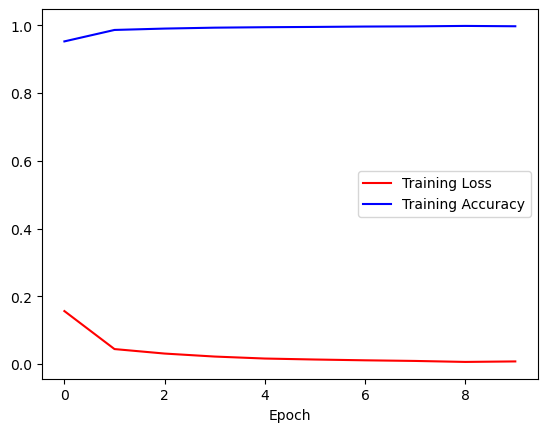

In [16]:
# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 下载和加载MNIST数据集
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

# 定义简单的卷积神经网络模型
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 初始化模型、损失函数和优化器
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 记录训练损失和准确度的列表
train_losses = []
train_accuracies = []

# 训练模型
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 统计训练损失
        running_loss += loss.item()

        # 统计训练准确度
        _, predicted = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted == labels).sum().item()

    # 计算平均训练损失
    average_loss = running_loss / len(train_loader)
    train_losses.append(average_loss)

    # 计算训练准确度
    accuracy = correct_predictions / total_samples
    train_accuracies.append(accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

# 绘制学习曲线，使用明显的颜色
plt.plot(train_losses, label='Training Loss of CNN', color='r')
plt.plot(train_accuracies, label='Training Accuracy  of CNN', color='b')

# 添加图例
plt.legend()

# 显示图形
plt.xlabel('Epoch')
plt.show()


In [17]:
from torchsummary import summary

# 打印模型结构和参数数量
summary(model, input_size=(1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


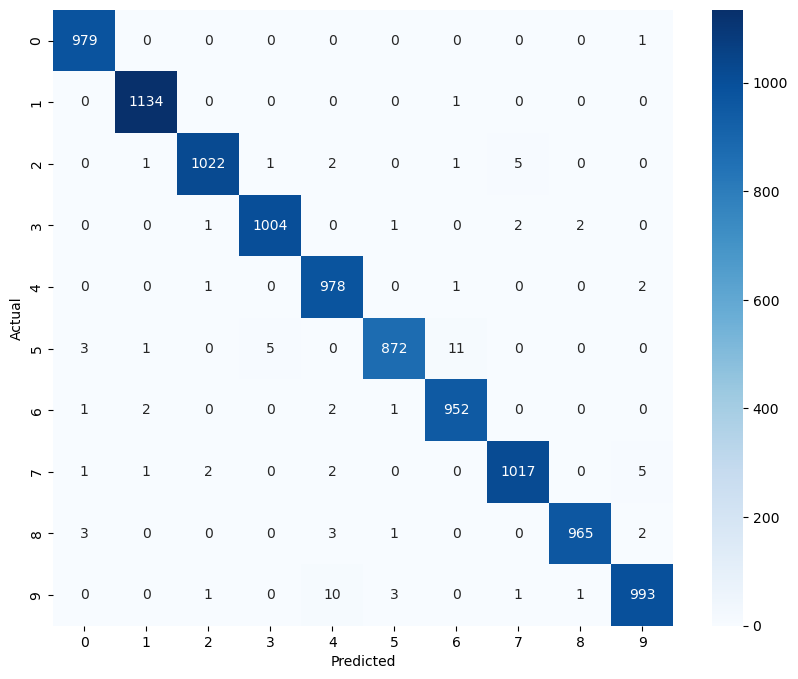

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# 在测试集上进行预测
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())

# 生成混淆矩阵
cm = confusion_matrix(all_labels, all_preds)

# 使用seaborn绘制热力图
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Epoch [1/10], Loss: 0.3793, Accuracy: 88.74%
Epoch [2/10], Loss: 0.1923, Accuracy: 94.32%
Epoch [3/10], Loss: 0.1415, Accuracy: 95.76%
Epoch [4/10], Loss: 0.1126, Accuracy: 96.71%
Epoch [5/10], Loss: 0.0952, Accuracy: 97.02%
Epoch [6/10], Loss: 0.0821, Accuracy: 97.50%
Epoch [7/10], Loss: 0.0748, Accuracy: 97.70%
Epoch [8/10], Loss: 0.0668, Accuracy: 97.91%
Epoch [9/10], Loss: 0.0611, Accuracy: 98.08%
Epoch [10/10], Loss: 0.0566, Accuracy: 98.11%


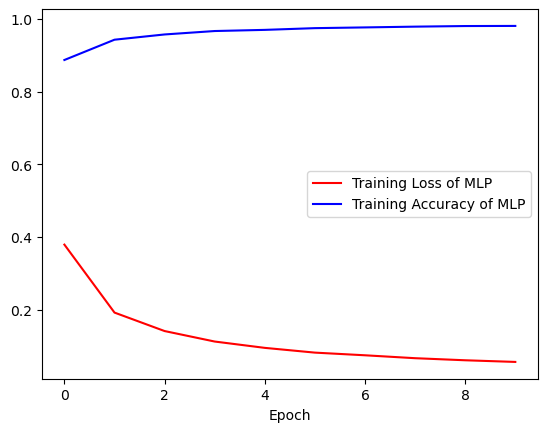

In [22]:
# 定义全连接神经网络模型
class SimpleMLP(nn.Module):
    def __init__(self):
        super(SimpleMLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载MNIST训练集和测试集
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# 创建数据加载器
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# 初始化模型、损失函数和优化器
model = SimpleMLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 记录训练过程中的损失和准确度
train_losses = []
train_accuracies = []

# 训练模型
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # 计算训练准确度和损失
    train_accuracy = correct / total
    train_loss = running_loss / len(train_loader)

    # 保存训练过程中的准确度和损失
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {train_loss:.4f}, Accuracy: {train_accuracy * 100:.2f}%')

# 绘制学习曲线
plt.plot(train_losses, label='Training Loss of MLP', color='r')
plt.plot(train_accuracies, label='Training Accuracy of MLP', color='b')


# 添加图例
plt.legend()

# 显示图形
plt.xlabel('Epoch')
plt.show()


In [23]:
# 模型可视化
from torchsummary import summary

# 显示模型结构
summary(model, input_size=(1, 28, 28))
'''
Layer (type): 每一层的类型。这里有 Flatten 层、Linear 层（全连接层）、ReLU 层。
Output Shape: 每一层的输出形状。[-1, 784] 表示 Flatten 层的输出形状是一个包含784个元素的一维数组。
Param #: 每一层的参数数量。注意，Flatten 层没有参数。
Total params: 整个模型的总参数数量。即所有层的参数数量之和。
Trainable params: 可训练的参数数量。这是模型中需要在训练过程中更新的参数数量。
Non-trainable params: 不可训练的参数数量。在这个模型中，所有的参数都是可训练的。
Input size (MB): 模型输入的大小，单位是兆字节（MB）。
Forward/backward pass size (MB): 每一前向/反向传播过程中的内存消耗，单位是兆字节（MB）。
Params size (MB): 模型参数占用的内存大小，单位是兆字节（MB）。
Estimated Total Size (MB): 模型总共占用的内存大小的估计，包括输入和参数，单位是兆字节（MB）。
'''

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
           Flatten-1                  [-1, 784]               0
            Linear-2                  [-1, 128]         100,480
              ReLU-3                  [-1, 128]               0
            Linear-4                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.39
Estimated Total Size (MB): 0.40
----------------------------------------------------------------


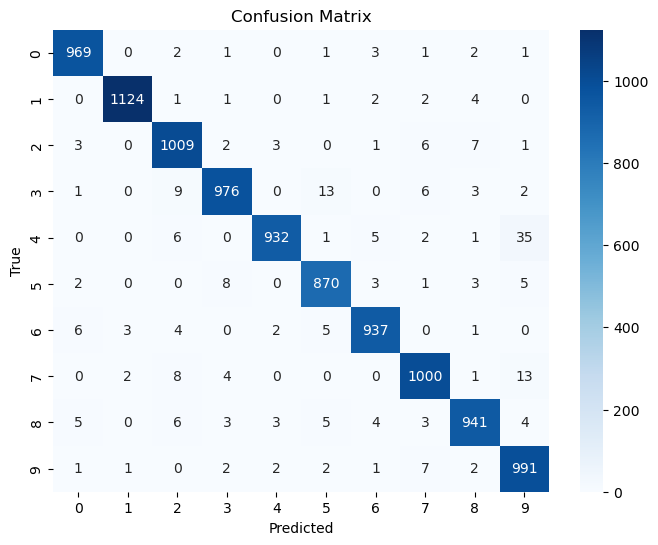

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
# 混淆矩阵分析
model.eval()
all_labels, all_predictions = [], []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

# 计算混淆矩阵
cm = confusion_matrix(all_labels, all_predictions)

# 可视化混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
